In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path()
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f.name,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.368421,1.000000,0.538462,1.676233,9.649195,4.531638,2588.659668,50.878872,28.755017,421.657446,0.665406,0.815594,20.0,0.20
1,0.300000,0.857143,0.444444,6.000943,34.544298,12.893653,26661.224609,163.282650,65.544386,1799.571763,6.853178,2.617440,12.0,0.16
2,0.875000,1.000000,0.933333,0.056681,0.326284,0.111742,9.320016,3.052870,2.135930,15.939934,0.002396,0.048938,6.0,0.08
3,0.352941,0.857143,0.500000,1.698004,9.774525,4.222035,290.619873,17.047576,12.925989,79.550282,0.074703,0.273275,10.0,0.08
4,0.291667,1.000000,0.451613,18.850272,108.511175,40.726580,28711.511719,169.444717,74.336572,1216.619958,7.380197,2.716219,6.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.250000,1.000000,0.400000,2.420984,13.936339,7.987375,574482.437500,757.946201,401.711266,6151.385732,147.668762,12.149967,18.0,0.08
106,0.500000,1.000000,0.666667,2.684191,15.451486,3.613943,209.132889,14.461428,10.856035,60.080716,0.053757,0.231818,6.0,0.20
107,0.454545,0.714286,0.555556,0.879321,5.061791,1.704604,99.053963,9.952586,6.975758,73.258947,0.025461,0.159541,8.0,0.10
108,0.333333,1.000000,0.500000,1.403894,8.081486,3.807561,53924.117188,232.215669,147.133164,1430.353534,13.861012,3.722444,16.0,0.08


<Axes: xlabel='noise', ylabel='dt'>

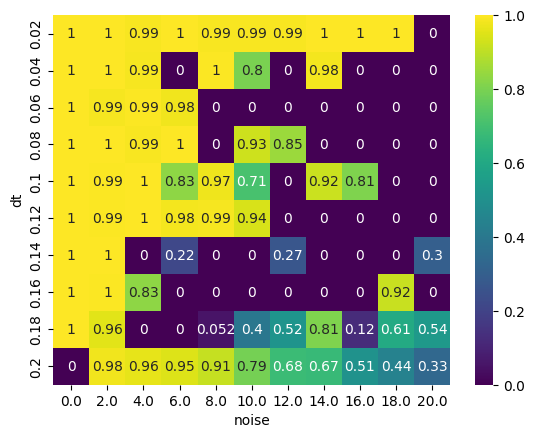

: 

In [ ]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

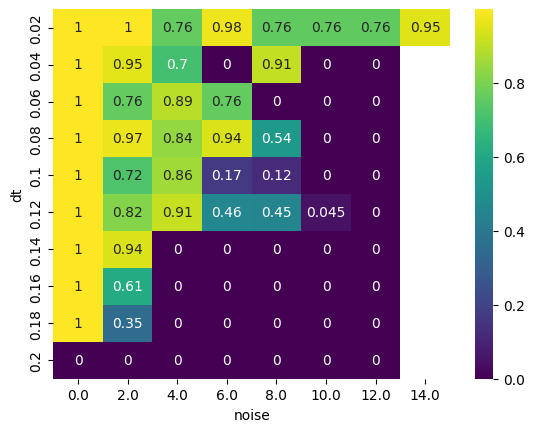

In [10]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
